In [1]:
#Junming Chen

import pandas as pd
import numpy as np

#read the 2016 Presidential election tweets and assigned column names. 

tweet_cols = ['Name', 'ScreenName', 'UserID', 'FollowersCount', 'FriendsCount','Location', 'Description', 'CreatedAt', 'StatusID', 'Language', 'Place', 'RetweetCount','FavoriteCount', 'Text']
tweets = pd.read_table('clinton_trump_tweets.txt', header=None, names=tweet_cols ,encoding= "ISO-8859-1")
#Output the first five rows
tweets.head()

Name       ScreenName      UserID  FollowersCount  \
0                 Cebel           Cebel6  1519696717             132   
1                Cookie     Cookiemuffen   109945090            2154   
2               nolaguy      nolaguy_phd  1450086582             797   
3            Mark Hager        marksnark   167177185             204   
4  Capitalist Creations  aaronjhoddinott  1191022351             775   

   FriendsCount               Location  \
0           263  Little Rock, Arkansas   
1          2034     The American South   
2          1188                    NaN   
3           448             Pittsburgh   
4           154                 Canada   

                                         Description  \
0  Arkansas Razorback Fan Just trying to be #Unco...   
1  Got married after college. I don't regret star...   
2  An LSU Ph.D student living in New Orleans, try...   
3  Hip, trendy, smart, funny, fit, lobbyist. U? B...   
4  Entrepreneur, startup investor, political junk...   

                       CreatedAt            StatusID Language Place  \
0  Sat Oct 29 08:10:06 EEST 2016  792232017094119425       en   NaN   
1  Wed Oct 26 18:44:08 EEST 2016  791304413923213312       en   NaN   
2  Sat Oct 29 21:53:29 EEST 2016  792439227090767872       en   NaN   
3  Wed Oct 26 00:33:20 EEST 2016  791029904733331457       en   NaN   
4  Fri Oct 28 05:05:10 EEST 2016  791823089700962304       en   NaN   

   RetweetCount  FavoriteCount  \
0             0              1   
1          1937              0   
2             0              0   
3           891              0   
4             7              0   

                                                Text  
0  @NWAJimmy I've read it now though brother. Was...  
1  RT @wikileaks: New poll puts Pirate Party on c...  
2  @gaystoner821 I think New Orleans spoiled me w...  
3  RT @LOLGOP: ACA needs fixes but know da facts:...  
4  RT @FastCompany: Alphabet shares soar on bette...

In [2]:
#Check Text Columns if the word is star with an "RT" and assigned the boolean to Retweets
retweets = tweets["Text"].str.startswith("RT",na=False)
retweets.head(10)

0    False
1     True
2    False
3     True
4     True
5     True
6    False
7    False
8     True
9     True
Name: Text, dtype: bool

In [3]:
#Append all of the booleans we got to a new Column "IsitRetweet"
tweets['IsitRetweet'] = retweets
tweets.head()


Name       ScreenName      UserID  FollowersCount  \
0                 Cebel           Cebel6  1519696717             132   
1                Cookie     Cookiemuffen   109945090            2154   
2               nolaguy      nolaguy_phd  1450086582             797   
3            Mark Hager        marksnark   167177185             204   
4  Capitalist Creations  aaronjhoddinott  1191022351             775   

   FriendsCount               Location  \
0           263  Little Rock, Arkansas   
1          2034     The American South   
2          1188                    NaN   
3           448             Pittsburgh   
4           154                 Canada   

                                         Description  \
0  Arkansas Razorback Fan Just trying to be #Unco...   
1  Got married after college. I don't regret star...   
2  An LSU Ph.D student living in New Orleans, try...   
3  Hip, trendy, smart, funny, fit, lobbyist. U? B...   
4  Entrepreneur, startup investor, political junk...   

                       CreatedAt            StatusID Language Place  \
0  Sat Oct 29 08:10:06 EEST 2016  792232017094119425       en   NaN   
1  Wed Oct 26 18:44:08 EEST 2016  791304413923213312       en   NaN   
2  Sat Oct 29 21:53:29 EEST 2016  792439227090767872       en   NaN   
3  Wed Oct 26 00:33:20 EEST 2016  791029904733331457       en   NaN   
4  Fri Oct 28 05:05:10 EEST 2016  791823089700962304       en   NaN   

   RetweetCount  FavoriteCount  \
0             0              1   
1          1937              0   
2             0              0   
3           891              0   
4             7              0   

                                                Text  IsitRetweet  
0  @NWAJimmy I've read it now though brother. Was...        False  
1  RT @wikileaks: New poll puts Pirate Party on c...         True  
2  @gaystoner821 I think New Orleans spoiled me w...        False  
3  RT @LOLGOP: ACA needs fixes but know da facts:...         True  
4  RT @FastCompany: Alphabet shares soar on bette...         True

In [4]:
#Drop Rows that if the IsitRetweet = True
tweets = tweets.drop(tweets[(tweets.IsitRetweet==True)].index)
tweets.head()


Name     ScreenName      UserID  FollowersCount  FriendsCount  \
0           Cebel         Cebel6  1519696717             132           263   
2         nolaguy    nolaguy_phd  1450086582             797          1188   
6   David Walling  davidjwalling   106568768             975          2781   
7      robert2266     robert2266    17101060             845           938   
10         neddyo         neddyo    16818809            1400           379   

                     Location  \
0       Little Rock, Arkansas   
2                         NaN   
6                  Dallas, TX   
7                The Universe   
10  Long Island and beyond...   

                                          Description  \
0   Arkansas Razorback Fan Just trying to be #Unco...   
2   An LSU Ph.D student living in New Orleans, try...   
6   Bloodletting secure algorithms close to the bo...   
7                                       The Dark Lord   
10  You should be digging it while it's happening ...   

                        CreatedAt            StatusID Language Place  \
0   Sat Oct 29 08:10:06 EEST 2016  792232017094119425       en   NaN   
2   Sat Oct 29 21:53:29 EEST 2016  792439227090767872       en   NaN   
6   Sat Oct 29 00:16:48 EEST 2016  792112907488079872       en   NaN   
7   Fri Oct 28 14:41:06 EEST 2016  791968028191711237       en   NaN   
10   Mon Oct 31 08:06:52 EET 2016  792971077836124160       en   NaN   

    RetweetCount  FavoriteCount  \
0              0              1   
2              0              0   
6              0              0   
7              0              0   
10             0              1   

                                                 Text  IsitRetweet  
0   @NWAJimmy I've read it now though brother. Was...        False  
2   @gaystoner821 I think New Orleans spoiled me w...        False  
6   #infosec #Intel #ACM #IEEE  Impacts Haswell mi...        False  
7   Hacked e-mails show Clinton campaigns fears ab...        False  
10                                        Hulk smash!        False

In [5]:
#A new better way to clean data, can utilize this on RT also 
# Create new Dataframe New_tweets that only have Text that Starts with @ or #
new_tweets = tweets[tweets.Text.str.startswith(('@','#'))]
new_tweets.head(10)

Name      ScreenName      UserID  FollowersCount  FriendsCount  \
0            Cebel          Cebel6  1519696717             132           263   
2          nolaguy     nolaguy_phd  1450086582             797          1188   
6    David Walling   davidjwalling   106568768             975          2781   
13   Harry Binford   CaptainNormal  2447279666             895          1224   
22      McDonald's   McDonaldsCorp   111679943          143939         11621   
25             Bru  thatoaklandkid   211144375             338          1152   
27  Bryan Vehonsky  Bryan_Vehonsky    17547533            1369          1533   
28     Andrea Rosu     Andrea_Rosu  2263109930            9767           693   
33        BIG MARV        BIGGMARV    15627940           49331         34131   
34         My Info        chrisf91  2424856262             129           822   

                         Location  \
0           Little Rock, Arkansas   
2                             NaN   
6                      Dallas, TX   
13                            USA   
22                  Oak Brook, IL   
25  The Town, The 510, Oakland BB   
27                   Columbus, OH   
28              San Francisco, CA   
33                     OAKLAND,CA   
34                San Antonio, TX   

                                          Description  \
0   Arkansas Razorback Fan Just trying to be #Unco...   
2   An LSU Ph.D student living in New Orleans, try...   
6   Bloodletting secure algorithms close to the bo...   
13  Proud Christian husband, frequent shooting ran...   
22  Learn about McDonalds history, people, food, &...   
25  I like to play records at parties and give peo...   
27           Just living this life one day at a time.   
28  Fetish and Erotic Model, Creator and lover of ...   
33  IM BIGG MARV,MC HAMMER'S COUSIN FROM THE NEW H...   
34  im not supersticous, but... i am a little stic...   

                        CreatedAt            StatusID Language Place  \
0   Sat Oct 29 08:10:06 EEST 2016  792232017094119425       en   NaN   
2   Sat Oct 29 21:53:29 EEST 2016  792439227090767872       en   NaN   
6   Sat Oct 29 00:16:48 EEST 2016  792112907488079872       en   NaN   
13  Thu Oct 27 21:44:44 EEST 2016  791712249685676032       en   NaN   
22  Wed Oct 26 22:44:02 EEST 2016  791364785132695554       en   NaN   
25  Wed Oct 26 04:51:53 EEST 2016  791094969410854912       en   NaN   
27  Fri Oct 28 20:17:08 EEST 2016  792052592151003137       en   NaN   
28  Fri Oct 28 23:52:31 EEST 2016  792106796043210753       en   NaN   
33   Mon Oct 31 01:34:11 EET 2016  792872257315966976       en   NaN   
34  Fri Oct 28 09:34:20 EEST 2016  791890827974840322       en   NaN   

    RetweetCount  FavoriteCount  \
0              0              1   
2              0              0   
6              0              0   
13             0              0   
22             0              0   
25             0              0   
27             0              0   
28             0              0   
33             2              4   
34             0              0   

                                                 Text  IsitRetweet  
0   @NWAJimmy I've read it now though brother. Was...        False  
2   @gaystoner821 I think New Orleans spoiled me w...        False  
6   #infosec #Intel #ACM #IEEE  Impacts Haswell mi...        False  
13  @WayneDupreeShow #climatechange is the democra...        False  
22  @tansleyemiley69 Drop by anytime. Well wait fo...        False  
25  @MamaDurant @KDTrey5 @NBA @warriors @Oakland @...        False  
27  @KyleOrl @ZekeJMiller Has to be something from...        False  
28  @MutinyWrestling I know!! Ill let you know if ...        False  
33  @Timberland !!!Store #305 just took great  car...        False  
34  @mlombardifoxtv its ok to admit bill bellichic...        False

In [ ]:
#1.2 Remove thehashtags/handles that have been used less than 20 times.
#Then remove the users that have used less than 20 tweets.

In [6]:
def get_hash(list):
    new_str=" "
    for c in list:
        if '#' in c or '@' in c:
            new_str= new_str + " " + c 
    return new_str

# Function to find hashtag and handles inside the Text 

In [7]:
#create new Column call hashtag_handle and insert with only hashtags and handles in them
#Spent a lot of times in this...
new_tweets['hashtag_handle'] = new_tweets.Text.str.split(' ').apply(get_hash)
new_tweets.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Name     ScreenName      UserID  FollowersCount  FriendsCount  \
0           Cebel         Cebel6  1519696717             132           263   
2         nolaguy    nolaguy_phd  1450086582             797          1188   
6   David Walling  davidjwalling   106568768             975          2781   
13  Harry Binford  CaptainNormal  2447279666             895          1224   
22     McDonald's  McDonaldsCorp   111679943          143939         11621   

                 Location                                        Description  \
0   Little Rock, Arkansas  Arkansas Razorback Fan Just trying to be #Unco...   
2                     NaN  An LSU Ph.D student living in New Orleans, try...   
6              Dallas, TX  Bloodletting secure algorithms close to the bo...   
13                    USA  Proud Christian husband, frequent shooting ran...   
22          Oak Brook, IL  Learn about McDonalds history, people, food, &...   

                        CreatedAt            StatusID Language Place  \
0   Sat Oct 29 08:10:06 EEST 2016  792232017094119425       en   NaN   
2   Sat Oct 29 21:53:29 EEST 2016  792439227090767872       en   NaN   
6   Sat Oct 29 00:16:48 EEST 2016  792112907488079872       en   NaN   
13  Thu Oct 27 21:44:44 EEST 2016  791712249685676032       en   NaN   
22  Wed Oct 26 22:44:02 EEST 2016  791364785132695554       en   NaN   

    RetweetCount  FavoriteCount  \
0              0              1   
2              0              0   
6              0              0   
13             0              0   
22             0              0   

                                                 Text  IsitRetweet  \
0   @NWAJimmy I've read it now though brother. Was...        False   
2   @gaystoner821 I think New Orleans spoiled me w...        False   
6   #infosec #Intel #ACM #IEEE  Impacts Haswell mi...        False   
13  @WayneDupreeShow #climatechange is the democra...        False   
22  @tansleyemiley69 Drop by anytime. Well wait fo...        False   

                       hashtag_handle  
0                           @NWAJimmy  
2                       @gaystoner821  
6          #infosec #Intel #ACM #IEEE  
13    @WayneDupreeShow #climatechange  
22                   @tansleyemiley69

In [8]:
# Create a Series that stores all of the @&# we got from earlier
hashtag_series = pd.Series(new_tweets['hashtag_handle'].str.cat(sep=' ').split())
#Retreive the counts of each individual hashtags and handles.
top_hashtag = hashtag_series.value_counts()
top_hashtag

@realDonaldTrump    23155
@HillaryClinton     17255
@FoxNews             9426
@megynkelly          7000
@CNN                 6564
@YouTube             4193
@newtgingrich        4093
#NowPlaying          4040
@seanhannity         3729
@                    3492
#Now                 3431
@wikileaks           3281
@KellyannePolls      3197
#news                3158
@washingtonpost      3030
@IAMDONMEGA1017      3016
#DOWNLOAD            3015
#SPOTIFY             3015
#ALBUM               3015
@MSNBC               2851
@FBI                 2703
#YOUNGMA             2658
@nytimes             2651
@POTUS               2522
@JoyAnnReid          2493
@jasoninthehouse     2457
@ABC                 2354
#LGBT                2354
#Trump               2314
@mitchellvii         2128
                    ...  
#Klaroline              1
@NuBlackVision          1
@ta_dieringer           1
@KingChristianX         1
@jennpicarderare        1
@Bernadette83           1
@shaynus                1
@jasmine_abb

In [9]:
#Create new list that only have hashtags and handles used more than 20 times.
top_hash_list = top_hashtag[top_hashtag>=20].index.tolist()
top_hash_list

['@realDonaldTrump',
 '@HillaryClinton',
 '@FoxNews',
 '@megynkelly',
 '@CNN',
 '@YouTube',
 '@newtgingrich',
 '#NowPlaying',
 '@seanhannity',
 '@',
 '#Now',
 '@wikileaks',
 '@KellyannePolls',
 '#news',
 '@washingtonpost',
 '@IAMDONMEGA1017',
 '#DOWNLOAD',
 '#SPOTIFY',
 '#ALBUM',
 '@MSNBC',
 '@FBI',
 '#YOUNGMA',
 '@nytimes',
 '@POTUS',
 '@JoyAnnReid',
 '@jasoninthehouse',
 '@ABC',
 '#LGBT',
 '#Trump',
 '@mitchellvii',
 '#MAGA',
 '@CNNPolitics',
 '@mike_pence',
 '@kurteichenwald',
 '@thehill',
 '@politico',
 '@jaketapper',
 '@WDFx2EU7',
 '@SpeakerRyan',
 '@GOP',
 '@IngrahamAngle',
 '@Evan_McMullin',
 '@BreitbartNews',
 '@NBCNews',
 '#Hillary',
 '@PrisonPlanet',
 '@CBSNews',
 '@Cubs',
 '@MMFlint',
 '@vine',
 '@WalshFreedom',
 '@DonaldJTrumpJr',
 '#jobs',
 '@RealJamesWoods',
 '@chrislhayes',
 '#WorldSeries',
 '@LouDobbs',
 '@Cernovich',
 '@DRUDGE_REPORT',
 '@TeamTrump',
 '@JaredWyand',
 '@JudgeJeanine',
 '@SopanDeb',
 '#CrookedHillary',
 '#ImWithHer',
 '#HillaryClinton',
 '@FLOTUS',
 '#TR

In [10]:
#function to Retrieve hashtags and handles from the top_hash_list, if not in it, return empty string
def top_hash(list):
    new_str=""
    for c in list.split():
        if c in top_hash_list:
            new_str= new_str + " " + c  
    return new_str

In [11]:
#Create new column "Tophash" and applying the function top_hash
new_tweets['tophash'] = new_tweets['hashtag_handle'].apply(top_hash)
new_tweets.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Name     ScreenName      UserID  FollowersCount  FriendsCount  \
0           Cebel         Cebel6  1519696717             132           263   
2         nolaguy    nolaguy_phd  1450086582             797          1188   
6   David Walling  davidjwalling   106568768             975          2781   
13  Harry Binford  CaptainNormal  2447279666             895          1224   
22     McDonald's  McDonaldsCorp   111679943          143939         11621   

                 Location                                        Description  \
0   Little Rock, Arkansas  Arkansas Razorback Fan Just trying to be #Unco...   
2                     NaN  An LSU Ph.D student living in New Orleans, try...   
6              Dallas, TX  Bloodletting secure algorithms close to the bo...   
13                    USA  Proud Christian husband, frequent shooting ran...   
22          Oak Brook, IL  Learn about McDonalds history, people, food, &...   

                        CreatedAt            StatusID Language Place  \
0   Sat Oct 29 08:10:06 EEST 2016  792232017094119425       en   NaN   
2   Sat Oct 29 21:53:29 EEST 2016  792439227090767872       en   NaN   
6   Sat Oct 29 00:16:48 EEST 2016  792112907488079872       en   NaN   
13  Thu Oct 27 21:44:44 EEST 2016  791712249685676032       en   NaN   
22  Wed Oct 26 22:44:02 EEST 2016  791364785132695554       en   NaN   

    RetweetCount  FavoriteCount  \
0              0              1   
2              0              0   
6              0              0   
13             0              0   
22             0              0   

                                                 Text  IsitRetweet  \
0   @NWAJimmy I've read it now though brother. Was...        False   
2   @gaystoner821 I think New Orleans spoiled me w...        False   
6   #infosec #Intel #ACM #IEEE  Impacts Haswell mi...        False   
13  @WayneDupreeShow #climatechange is the democra...        False   
22  @tansleyemiley69 Drop by anytime. Well wait fo...        False   

                       hashtag_handle                           tophash  
0                           @NWAJimmy                                    
2                       @gaystoner821                                    
6          #infosec #Intel #ACM #IEEE                          #infosec  
13    @WayneDupreeShow #climatechange   @WayneDupreeShow #climatechange  
22                   @tansleyemiley69

In [12]:
#Replace empty string with NAN and drop the entire row if tophash is empty
new_tweets['tophash'].replace('', np.nan, inplace=True)
new_tweets.dropna(subset=['tophash'], inplace=True)
new_tweets.head(10)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Name      ScreenName      UserID  FollowersCount  \
6       David Walling   davidjwalling   106568768             975   
13      Harry Binford   CaptainNormal  2447279666             895   
25                Bru  thatoaklandkid   211144375             338   
27     Bryan Vehonsky  Bryan_Vehonsky    17547533            1369   
34            My Info        chrisf91  2424856262             129   
51           EmmaPeel      Emma__Peel   180304807            2648   
52              Laura          Ciocia    17235735            2517   
56        Jody Taylor     Jodyjtaylor  1480641168             397   
66          graceblue       graceblue    16430972              94   
76  Bernard Silverman     DonKeehotey    22897055             127   

    FriendsCount                       Location  \
6           2781                     Dallas, TX   
13          1224                            USA   
25          1152  The Town, The 510, Oakland BB   
27          1533                   Columbus, OH   
34           822                San Antonio, TX   
51          4549          emma w/2 underscores    
52          3602        London, Ontario, Canada   
56           842                            NaN   
66           369            Undercover reviewer   
76           147                     Dallas, TX   

                                          Description  \
6   Bloodletting secure algorithms close to the bo...   
13  Proud Christian husband, frequent shooting ran...   
25  I like to play records at parties and give peo...   
27           Just living this life one day at a time.   
34  im not supersticous, but... i am a little stic...   
51                 Good deeds and kindness never fail   
52                Steam Pipe Trunk Distribution Venue   
56                                                NaN   
66  I'm eclectic. I love my family, love life and ...   
76  Circus fire-eater, underwater demolitions expe...   

                        CreatedAt            StatusID Language Place  \
6   Sat Oct 29 00:16:48 EEST 2016  792112907488079872       en   NaN   
13  Thu Oct 27 21:44:44 EEST 2016  791712249685676032       en   NaN   
25  Wed Oct 26 04:51:53 EEST 2016  791094969410854912       en   NaN   
27  Fri Oct 28 20:17:08 EEST 2016  792052592151003137       en   NaN   
34  Fri Oct 28 09:34:20 EEST 2016  791890827974840322       en   NaN   
51  Fri Oct 28 23:11:29 EEST 2016  792096469994004480       en   NaN   
52  Sun Oct 30 02:28:03 EEST 2016  792508326537994240       en   NaN   
56  Sun Oct 30 01:04:01 EEST 2016  792487177150013440       en   NaN   
66  Wed Oct 26 10:41:18 EEST 2016  791182905775001600       en   NaN   
76  Sat Oct 29 17:53:58 EEST 2016  792378953096761344       en   NaN   

    RetweetCount  FavoriteCount  \
6              0              0   
13             0              0   
25             0              0   
27             0              0   
34             0              0   
51             0              0   
52             0              0   
56             0              0   
66             0              4   
76             0              0   

                                                 Text  IsitRetweet  \
6   #infosec #Intel #ACM #IEEE  Impacts Haswell mi...        False   
13  @WayneDupreeShow #climatechange is the democra...        False   
25  @MamaDurant @KDTrey5 @NBA @warriors @Oakland @...        False   
27  @KyleOrl @ZekeJMiller Has to be something from...        False   
34  @mlombardifoxtv its ok to admit bill bellichic...        False   
51  @advocatehealth We're giving away a L @KrisBry...        False   
52  @WritersDigest @NaNoWriMo There's no "there" t...        False   
56  @ZekeJMiller Deeply troubling to her, I would ...        False   
66  @Leigh_24j @ErikaJayneFan @HeatherDubrow Exact...        False   
76  @paulkrugman @wendydavis Even false shit can b...        False   

                                       hashtag_handle  \
6                          #infosec #Intel #ACM #IEEE   
13 

In [13]:
#Remove Users with less than 20 tweets
#Use grouby and count to retrive amounts of tweets for each individual UserID form database
top_users = new_tweets.groupby('UserID').tophash.count().sort_values(ascending=False)
#Include Users with only 20 tweet or more
top_users = top_users[top_users>=20]
top_users

UserID
1971604699    3016
1463096012    2654
1722976068    1717
1592314058    1712
242017731     1634
2328069194    1535
129865493     1311
1535902620    1119
1140594793    1074
2215753303     954
228805804      946
153860022      913
1493419507     890
249880957      875
107742714      794
235337115      694
1965774102     676
231570992      673
180058006      671
121403596      656
14437333       628
2324027460     625
19644086       625
151552315      620
235673247      608
2496180434     601
22897055       601
1450257787     598
218479755      574
153218852      548
              ... 
1010275567      20
1616851796      20
2362582044      20
1013869160      20
148743944       20
194059943       20
2361923064      20
1551124148      20
1911669630      20
220129909       20
1235503465      20
195466555       20
22407018        20
1610440968      20
104055229       20
234168147       20
22407279        20
244322191       20
15330755        20
14935739        20
108957671       20
11040

In [14]:
#Refresh Dataframe with UserID thats have 20 tweets or more.
#Using isin,if the userID is in the Top_Users list 
new_tweets =  new_tweets[new_tweets['UserID'].isin(top_users.index.tolist())]
new_tweets.head()

Name     ScreenName      UserID  FollowersCount  FriendsCount  \
6   David Walling  davidjwalling   106568768             975          2781   
13  Harry Binford  CaptainNormal  2447279666             895          1224   
34        My Info       chrisf91  2424856262             129           822   
51       EmmaPeel     Emma__Peel   180304807            2648          4549   
52          Laura         Ciocia    17235735            2517          3602   

                   Location  \
6                Dallas, TX   
13                      USA   
34          San Antonio, TX   
51    emma w/2 underscores    
52  London, Ontario, Canada   

                                          Description  \
6   Bloodletting secure algorithms close to the bo...   
13  Proud Christian husband, frequent shooting ran...   
34  im not supersticous, but... i am a little stic...   
51                 Good deeds and kindness never fail   
52                Steam Pipe Trunk Distribution Venue   

                        CreatedAt            StatusID Language Place  \
6   Sat Oct 29 00:16:48 EEST 2016  792112907488079872       en   NaN   
13  Thu Oct 27 21:44:44 EEST 2016  791712249685676032       en   NaN   
34  Fri Oct 28 09:34:20 EEST 2016  791890827974840322       en   NaN   
51  Fri Oct 28 23:11:29 EEST 2016  792096469994004480       en   NaN   
52  Sun Oct 30 02:28:03 EEST 2016  792508326537994240       en   NaN   

    RetweetCount  FavoriteCount  \
6              0              0   
13             0              0   
34             0              0   
51             0              0   
52             0              0   

                                                 Text  IsitRetweet  \
6   #infosec #Intel #ACM #IEEE  Impacts Haswell mi...        False   
13  @WayneDupreeShow #climatechange is the democra...        False   
34  @mlombardifoxtv its ok to admit bill bellichic...        False   
51  @advocatehealth We're giving away a L @KrisBry...        False   
52  @WritersDigest @NaNoWriMo There's no "there" t...        False   

                                       hashtag_handle  \
6                          #infosec #Intel #ACM #IEEE   
13                    @WayneDupreeShow #climatechange   
34                         @mlombardifoxtv @ochocinco   
51    @advocatehealth @KrisBryant_23 #FlyTheW #Wor...   
52                          @WritersDigest @NaNoWriMo   

                                  tophash  
6                                #infosec  
13        @WayneDupreeShow #climatechange  
34                             @ochocinco  
51   @KrisBryant_23 #FlyTheW #WorldSeries  
52                             @NaNoWriMo

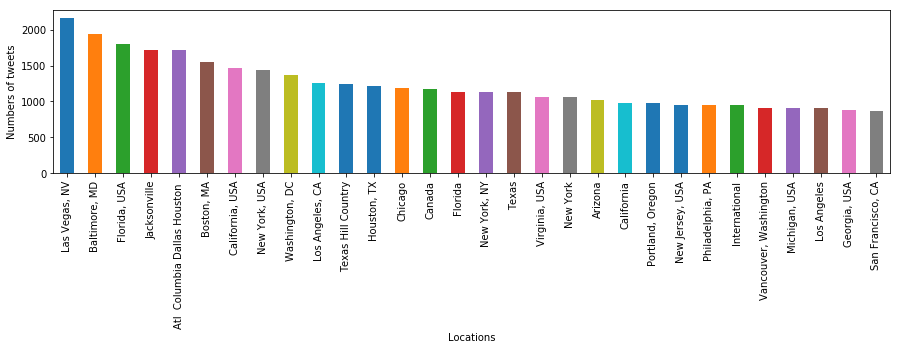

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

# Create a new series using grouby and count to retrieve top 30 locations with most tweets

top_locations = new_tweets.groupby('Location').tophash.count().sort_values(ascending=False)
#Optional: Drop unspecific location such as U.S., USA, and WorldWide
top_locations.drop(['United States','USA',"WORLDWIDE"], inplace=True)
top_locations = top_locations.head(30)
top_locations.plot(kind='bar', figsize=(15, 3))
plt.xlabel("Locations")
plt.ylabel("Numbers of tweets")
plt.show()
#Create Pplot

In [66]:
#Create a new Big String of Tweet words that from the Top 3 Location
top_threeloc = top_locations.head(3)
toploc_text = new_tweets.tophash[new_tweets['Location'].isin(top_threeloc.index.tolist())]
toploc_text = toploc_text.str.cat(sep=' ')
toploc_text

" #NowPlaying  #NowPlaying  @RepRubenGallego  #ImWithHer  @newtgingrich @megynkelly @DanaPerino @ShepNewsTeam  @ConstanceQueen8  @marcyrw  @realDonaldTrump #FBI #JamesComey  @idesignwis @CNN @MSNBC @HillaryClinton  @PuestoLoco @bannerite  @WDWToday  @Frank_Baws  @JudgeJeanine  @jonhartmannjazz  @Crystal1Johnson  @megynkelly @newtgingrich  #NowPlaying  #NowPlaying  @melimel521 @wikileaks @JesseRodriguez  @BreitbartNews @GOP  @sowtrout @GOP  @PRyan  #NowPlaying  @GOP  @maryaddie100  @HAGOODMANAUTHOR  @nprpolitics  @Evan_McMullin  #NowPlaying  @CGAdamo  @KimDotcom @tamaraleighllc @GOP  @mitchellvii  @DiamondandSilk @UtahGOP @SpeakerRyan @MittRomney @Evan_McMullin  @FoxNews @MeghanMcCain @HillaryClinton  @BeladonnaRogers  @nathanTbernard @mike_pence  @ChristieC733 @jimlibertarian  #NowPlaying  @RealJamesWoods  @RandyRRQuaid  @carrieksada @POTUS  @megynkelly @DanaPerino @ShepNewsTeam  @HillaryClinton  @GOP  @rickconnell2 @BarryNMooch @TeamTrumpAZ  @CurtisHouck  #NowPlaying  @Mi_Astronauta @

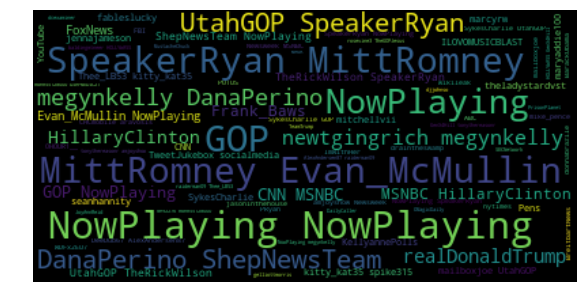

In [47]:
#Show Top 3 locations Tweets with WordCloud
wordcloud = WordCloud().generate(toploc_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")
plt.show()

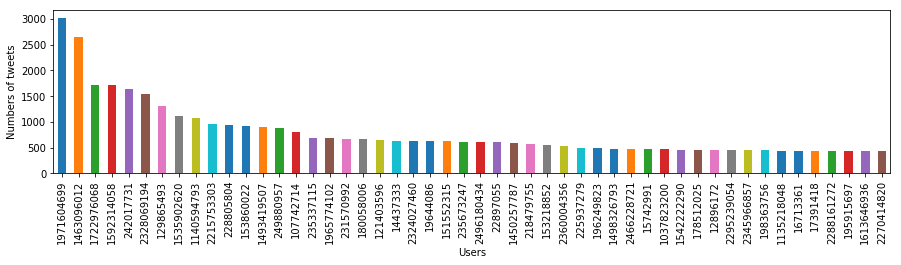

In [49]:
#Create Plot of Top 50 Users with their Amount of tweets.
top_fifty_users = top_users.head(50)
top_fifty_users.plot(kind='bar', figsize=(15, 3))
plt.xlabel("Users")
plt.ylabel("Numbers of tweets")
plt.show()

In [51]:
#Retrieve Top 3 Users tweet words
top_threeusers = top_fifty_users.head(3)
topuser_text = new_tweets.tophash[new_tweets['UserID'].isin(top_threeusers.index.tolist())]
topuser_text = topuser_text.str.cat(sep=' ')
topuser_text

' #politics #news  #Now  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY #LGBT @IAMDONMEGA1017  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY #LGBT @IAMDONMEGA1017  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY #LGBT @IAMDONMEGA1017  #hockey #news  #usgovernment #news  #football #news  #entertainment #news  #news  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY #LGBT @IAMDONMEGA1017  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY #LGBT @IAMDONMEGA1017  #health #news  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY #LGBT @IAMDONMEGA1017  #ALBUM #JADAKISS #DOWNLOAD #SPOTIFY @IAMDONMEGA1017  #ALBUM #CHIEFKEEF #DOWNLOAD #SPOTIFY #GLOGANG @IAMDONMEGA1017  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY #LGBT @IAMDONMEGA1017  #Now  #ALBUM #JADAKISS #DOWNLOAD #SPOTIFY @IAMDONMEGA1017  #Now  #Now  #politics #news  #ALBUM #JADAKISS #DOWNLOAD #SPOTIFY @IAMDONMEGA1017  #Now  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY #LGBT @IAMDONMEGA1017  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY #LGBT @IAMDONMEGA1017  #usgovernment #news  #politics #news  #europe #news  #Now  #ALBUM #YOUNGMA #DOWNLOAD #SPOTIFY

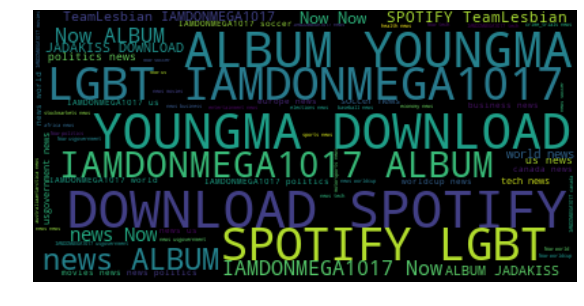

In [52]:
#Show Tweet words from the Top 3 Users with WordCloud
wordcloud = WordCloud().generate(topuser_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")
plt.show()

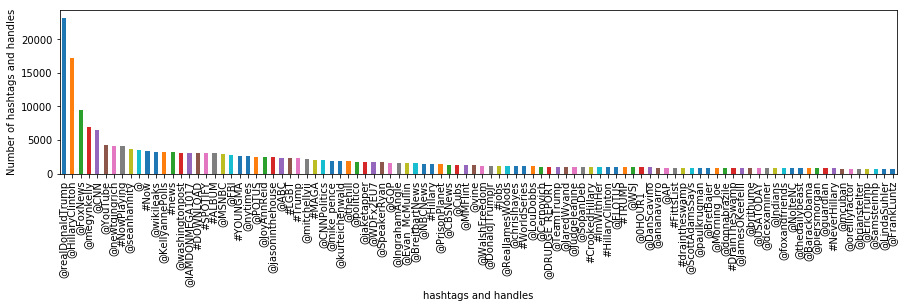

In [67]:
#Plot Top 100 Hashtags/handles
top_100_hash= top_hashtag.head(100)
top_100_hash.plot(kind='bar', figsize=(15, 3))
plt.xlabel("hashtags and handles")
plt.ylabel("Number of hashtags and handles")
plt.show()

In [62]:
#Combine all hashtags/handles from databse to a big string list
tophash_text = new_tweets.tophash.str.cat(sep=' ')
tophash_text

" #infosec  @WayneDupreeShow #climatechange  @ochocinco  @KrisBryant_23 #FlyTheW #WorldSeries  @NaNoWriMo  @ZekeJMiller  @HeatherDubrow  @paulkrugman  @FoxNews  #politics #news  @FoxHedgehog  #SourcesHaveConfirmed #Trump's #p2 #tcot  @politicalmath @PolitiFact  @CashNastyGaming @NBA2K_MyTEAM @kevinlove  @ArianaGrande  @DallasDietzenba  @juliemason  @infowars @yournewswire  #Brexit  @washingtonpost @markberman  @GammaCounter  #scifi  @HillaryClinton  #jobs  @stephaniespills @RogerJStoneJr  #NowPlaying  @randyprine  @MichaelCohen212  @FoxNews @HillaryClinton  @accionempresa @gerenciatodos  @SkepticNikki  @RachelMaisonet @alllibertynews @TheLibRepublic  @kurteichenwald @JoyAnnReid @Fahrenthold  @Reuters  @mmfa @chucktodd  @TheRevAl  @DGear86 @acidphire21  #BBC  @jonfavs @GOP  @AlbertBreer  @XLNB  #NowPlaying  @RT_com  @asamjulian  @anathemasjpg  @HillaryClinton  @clevelanddotcom  @DLoesch @FDRLST  @HillaryClinton #LockHerUp  @StopNuclearWar  @mike_pence  @LGhail  @paulkrugman  @dsstella @

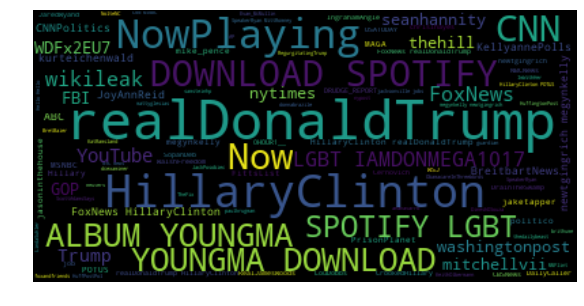

In [63]:
#Show the top hashtags and handles on wordcloud
wordcloud = WordCloud().generate(tophash_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")
plt.show()